In [1]:
!pip install pyalgotrading mplfinance --quiet

**Import all necessary packages**

In [2]:
import requests
import json
import pandas as pd
from pyalgotrading import *
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import mplfinance as mpf

**Class ScriptData fetches US Stock data using Alpha Vantage API**

In [3]:
class ScriptData:
    def __init__(self, api_key='0IXZ0TAVPY3QNC4Y'):
        # Initialize an empty dictionary to store fetched data
        self.all_data = {}
        # Alpha Vantage API key
        self.api_key = api_key
        
    def fetch_intraday_data(self, script):
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}'

        # Send a GET request to the API endpoint
        response = requests.get(url)
        if response.status_code == 200:
            # If the request is successful, store the fetched data in the dictionary
            self.all_data[script] = json.loads(response.text)
        else:
            # If the request fails, print an error message with the status code
            print(f'Request failed with status code {response.status_code}')
            
    def convert_intraday_data(self, script):
        # Check if the data for the script has been fetched
        if script not in self.all_data.keys():
            print(f"{script} is not fetched yet")
            
        else:
            time_series_data = self.all_data[script]['Time Series (5min)']
            converted_data = []

            for timestamp, values in time_series_data.items():
                # Extract the required values from each entry in the time series
                open_price = float(values['1. open'])
                high_price = float(values['2. high'])
                low_price = float(values['3. low'])
                close_price = float(values['4. close'])
                volume = int(values['5. volume'])

                converted_entry = {
                    'timestamp': pd.Timestamp(timestamp),
                    'open': open_price,
                    'high': high_price,
                    'low': low_price,
                    'close': close_price,
                    'volume': volume
                }

                converted_data.append(converted_entry)
                
            # Replace the original data with the converted data in the dictionary
            self.all_data[script] = pd.DataFrame(converted_data)
    
    def __getitem__(self, key):
        return self.all_data[key]
    
    def __contains__(self, key):
        return key in self.all_data

In [4]:
script_data = ScriptData()

In [5]:
script_data.fetch_intraday_data("GOOGL")
script_data.convert_intraday_data("GOOGL")
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-06-14 19:55:00,123.550,123.5500,123.550,123.5500,428
1,2023-06-14 19:50:00,123.620,123.6800,123.620,123.6800,893
2,2023-06-14 19:40:00,123.670,123.7599,123.670,123.7599,524
3,2023-06-14 19:35:00,123.760,123.7600,123.670,123.6700,642
4,2023-06-14 19:25:00,123.680,123.6800,123.680,123.6800,1319
...,...,...,...,...,...,...
95,2023-06-14 11:20:00,123.720,123.8900,123.650,123.8450,186240
96,2023-06-14 11:15:00,123.820,123.8900,123.670,123.7100,201630
97,2023-06-14 11:10:00,123.590,123.8200,123.560,123.8100,199838
98,2023-06-14 11:05:00,123.440,123.7150,123.400,123.5700,187194


In [6]:
script_data.fetch_intraday_data("AAPL")
script_data.convert_intraday_data("AAPL")
script_data['AAPL']

,timestamp,open,high,low,close,volume
0,2023-06-14 19:55:00,183.9200,183.92,183.8800,183.8800,1457
1,2023-06-14 19:50:00,183.8300,183.92,183.8300,183.8500,2444
2,2023-06-14 19:45:00,183.8600,183.86,183.8200,183.8200,1058
3,2023-06-14 19:40:00,183.8800,183.88,183.8500,183.8500,927
4,2023-06-14 19:35:00,183.8801,183.92,183.8600,183.8600,2254
...,...,...,...,...,...,...
95,2023-06-14 12:00:00,184.0900,184.13,183.9200,184.0031,333574
96,2023-06-14 11:55:00,184.1500,184.22,184.0000,184.0900,329828
97,2023-06-14 11:50:00,184.1900,184.24,184.1200,184.1550,256264
98,2023-06-14 11:45:00,184.1401,184.19,184.0800,184.1850,287234


In [7]:
'GOOGL' in script_data

True

In [8]:
'AAPL' in script_data

True

In [9]:
'NVDA' in script_data

False

In [10]:
def indicator1(df, timeperiod):
    # Create an empty DataFrame with columns 'timestamp' and 'indicators'
    indicator_df = pd.DataFrame(columns=['timestamp', 'indicator'])
    # Extract the 'close' values from the input DataFrame
    close_values = df['close'].tolist()
    
    for i in range(len(df)):
        if i < timeperiod - 1:
            # If there are not enough previous values, set the indicator value as None
            indicator_value = None
        else:
            # Calculate the average of the previous 'close' values as the indicator value
            indicator_value = sum(close_values[i-timeperiod+1:i+1]) / timeperiod
        
        # Create a dictionary entry with the timestamp and indicator value
        indicator_entry = {
            'timestamp': df['timestamp'].iloc[i],
            'indicator': indicator_value
        }
        
        # Append the dictionary entry as a new row to the indicator DataFrame
        indicator_df = pd.concat([indicator_df, pd.DataFrame(indicator_entry, index=[0])], ignore_index=True)
    
    return indicator_df

In [11]:
indicator1(script_data['GOOGL'], timeperiod=5)

,timestamp,indicator
0,2023-06-14 19:55:00,NaN
1,2023-06-14 19:50:00,NaN
2,2023-06-14 19:40:00,NaN
3,2023-06-14 19:35:00,NaN
4,2023-06-14 19:25:00,123.66798
...,...,...
95,2023-06-14 11:20:00,123.75732
96,2023-06-14 11:15:00,123.75502
97,2023-06-14 11:10:00,123.77102
98,2023-06-14 11:05:00,123.72300


In [12]:
indicator1(script_data['AAPL'], timeperiod=5)

,timestamp,indicator
0,2023-06-14 19:55:00,NaN
1,2023-06-14 19:50:00,NaN
2,2023-06-14 19:45:00,NaN
3,2023-06-14 19:40:00,NaN
4,2023-06-14 19:35:00,183.85200
...,...,...
95,2023-06-14 12:00:00,184.11924
96,2023-06-14 11:55:00,184.09724
97,2023-06-14 11:50:00,184.09524
98,2023-06-14 11:45:00,184.11262


In [13]:
class Strategy:
    def __init__(self, script):
        self.script = script
        self.data = ScriptData()
        self.df = None
        self.indicator_data = None
        self.signals = None
    
    def get_script_data(self):
        # Fetch intraday data for the specified script
        self.data.fetch_intraday_data(self.script)
        self.df = self.data[self.script]
        self.compute_indicator_data(timeperiod=5)
    
    def compute_indicator_data(self, timeperiod):
        # Convert the intraday data into pandas DataFrame
        self.data.convert_intraday_data(self.script)
        self.df = self.data[self.script]
        self.indicator_data = indicator1(self.df, timeperiod)
    
    def get_signals(self):
        # Create an empty DataFrame with columns 'timestamp' and 'signals'
        self.signals = pd.DataFrame(columns=['timestamp', 'signal'])
        
        if self.indicator_data is None or self.df is None:
            print("Indicator data and/or intraday data not available.")
            return
        
        for i in range(len(self.df)):
            # Retrieve the current and previous indicator values and close prices
            current_indicator = self.indicator_data['indicator'].iloc[i]
            previous_indicator = self.indicator_data['indicator'].iloc[i - 1]
            current_close = self.df['close'].iloc[i]
            previous_close = self.df['close'].iloc[i - 1]
            
            if current_indicator is None:
                continue
            elif current_indicator > current_close and previous_indicator <= previous_close:
                signal = 'BUY'
            elif current_indicator < current_close and previous_indicator >= previous_close:
                signal = 'SELL'
            else:
                signal = 'NO_SIGNAL'
            
            signal_entry = {
                'timestamp': self.df['timestamp'].iloc[i],
                'signal': signal
            }

        # Append the dictionary entry as a new row to the signals DataFrame
            self.signals = pd.concat([self.signals, pd.DataFrame(signal_entry, index=[0])], ignore_index=True)
        return self.signals.head(20)
            
    def plot_candlestick_chart(self):
        # Check if intraday data is available
        if self.df is None:
            print("Intraday data not available.")
            return

        plot_df = self.df.copy()
        # Convert the 'timestamp' column to datetime format
        plot_df['timestamp'] = pd.to_datetime(plot_df['timestamp'])
        plot_df.set_index('timestamp', inplace=True)
        
        # Plot the candlestick chart with specified parameters
        fig, ax = mpf.plot(plot_df, type='candle', style='charles', title=f'Candlestick Chart: {self.script}',
                           ylabel='Price', ylabel_lower='Volume', show_nontrading=False, figsize=(12, 8))

        plt.show()

In [14]:
strategy = Strategy('NVDA')

In [15]:
strategy.get_script_data()

In [16]:
strategy.get_signals()

,timestamp,signal
0,2023-06-14 19:55:00,NO_SIGNAL
1,2023-06-14 19:50:00,NO_SIGNAL
2,2023-06-14 19:45:00,NO_SIGNAL
3,2023-06-14 19:40:00,NO_SIGNAL
4,2023-06-14 19:35:00,NO_SIGNAL
5,2023-06-14 19:30:00,NO_SIGNAL
6,2023-06-14 19:25:00,BUY
7,2023-06-14 19:20:00,SELL
8,2023-06-14 19:15:00,BUY
9,2023-06-14 19:10:00,SELL


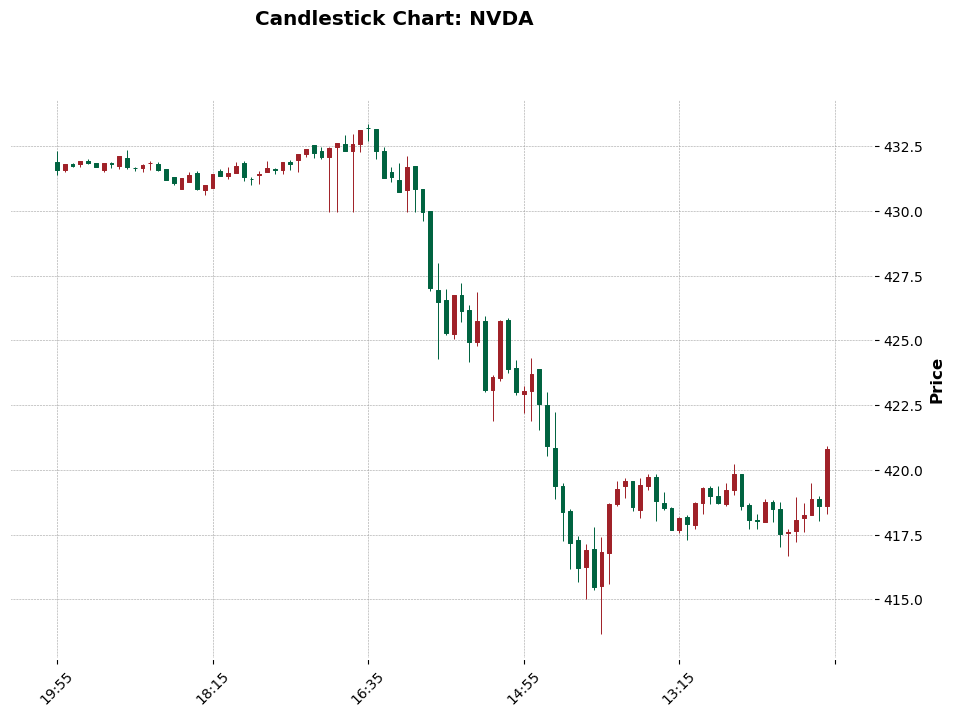

TypeError: cannot unpack non-iterable NoneType object

In [17]:
strategy.plot_candlestick_chart()